<a href="https://colab.research.google.com/github/ioadeer/bi-bycing-ba-2021/blob/main/Cleaning_Recorridos_de_bicicletas_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys

import urllib.request
# from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update( mpl.rcParamsDefault ) 

In [3]:
"""
Recorridios bicicletas
"""
bicis_recorridos_url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte/bicicletas-publicas/recorridos-realizados-2020.zip'
bicis_recorridos_zip = "./recorridos-realizados-2022.zip"
# bicis_recorridos_csv = './recorridos-realizados-2021.csv'
urllib.request.urlretrieve(
  bicis_recorridos_url,
  bicis_recorridos_zip
)


('./recorridos-realizados-2022.zip',
 <http.client.HTTPMessage at 0x7f5846858c10>)

In [4]:
bicis_recorridos_2020_df = pd.read_csv(
    bicis_recorridos_zip,
    compression = 'zip',
    encoding = 'utf-8', 
)

In [ ]:
'''
read localy
bicis_recorridos_2021_df = pd.read_csv(
    '../sets/compressed/recorridos-realizados-2021.zip',
    compression = 'zip',
    encoding = 'utf-8', 
)
'''

In [6]:
bicis_recorridos_2020_df.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020


No handles with labels found to put in legend.


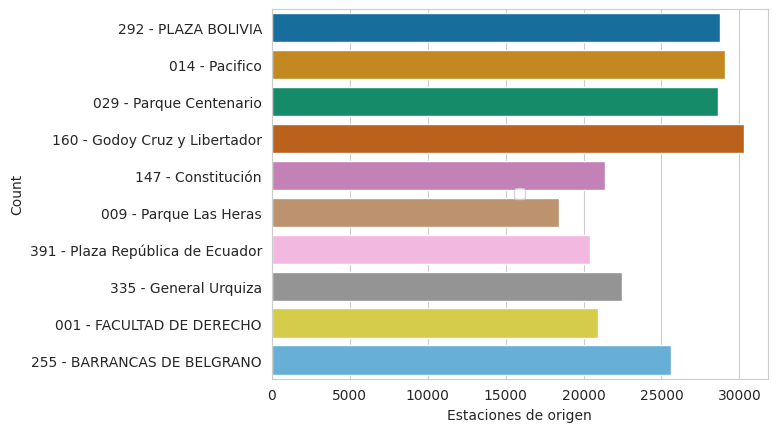

In [11]:
top_10 = bicis_recorridos_2020_df['nombre_estacion_origen'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2020_df[ bicis_recorridos_2020_df['nombre_estacion_origen'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='nombre_estacion_origen',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

No handles with labels found to put in legend.


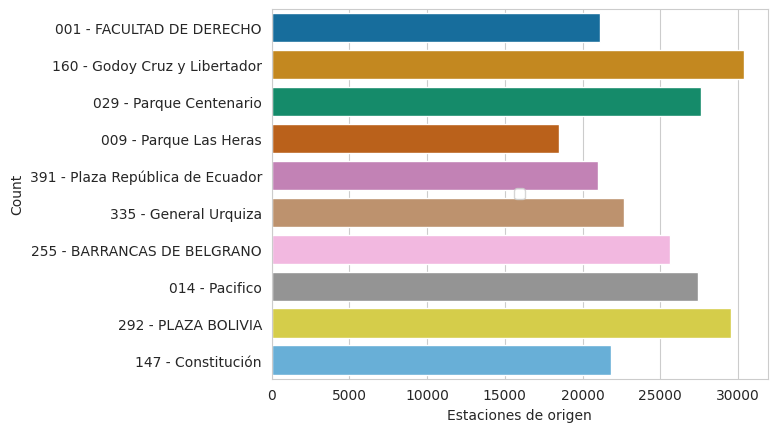

In [12]:
top_10 = bicis_recorridos_2020_df['nombre_estacion_destino'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2020_df[ bicis_recorridos_2020_df['nombre_estacion_destino'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='nombre_estacion_destino',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

In [13]:
bicis_recorridos_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002945 entries, 0 to 2002944
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   duracion_recorrido          int64  
 1   id_estacion_origen          int64  
 2   fecha_origen_recorrido      object 
 3   nombre_estacion_origen      object 
 4   fecha_destino_recorrido     object 
 5   id_estacion_destino         float64
 6   nombre_estacion_destino     object 
 7   id_usuario                  int64  
 8   direccion_estacion_origen   object 
 9   long_estacion_origen        float64
 10  lat_estacion_origen         float64
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  periodo                     int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 229.2+ MB


### Procesar fecha

Parsear object datetime a dia, mes, año

In [15]:
bicis_recorridos_2020_df['fecha_origen_recorrido']
formato = '%Y%m%d %H:%M:%S'
bicis_recorridos_2020_df['start datetime'] = pd.to_datetime(
    bicis_recorridos_2020_df['fecha_origen_recorrido'], 
    format = formato
)
bicis_recorridos_2020_df['START DATE'] = bicis_recorridos_2020_df['start datetime'].dt.strftime('%Y-%m-%d')
bicis_recorridos_2020_df['MES']  = bicis_recorridos_2020_df['start datetime'].dt.strftime('%B')
bicis_recorridos_2020_df['DIA']  = bicis_recorridos_2020_df['start datetime'].dt.strftime('%A')
bicis_recorridos_2020_df['TIME'] = bicis_recorridos_2020_df['start datetime'].dt.strftime('%H:%M')
bicis_recorridos_2020_df.head()

,duracion_recorrido,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,periodo,start datetime,START DATE,MES,DIA,TIME
0,882,116,2020-12-31 23:54:22,116 - HOSPITAL ALEMÁN,2021-01-01 00:09:04,214.0,142 - Armenia y Gorriti,666202,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54
1,894,116,2020-12-29 12:39:18,116 - HOSPITAL ALEMÁN,2020-12-29 12:54:12,214.0,142 - Armenia y Gorriti,332689,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39
2,1361,116,2020-12-21 21:21:38,116 - HOSPITAL ALEMÁN,2020-12-21 21:44:19,214.0,142 - Armenia y Gorriti,57949,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21
3,1010,116,2020-12-20 21:58:19,116 - HOSPITAL ALEMÁN,2020-12-20 22:15:09,214.0,142 - Armenia y Gorriti,454846,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58
4,1490,116,2020-12-20 13:32:53,116 - HOSPITAL ALEMÁN,2020-12-20 13:57:43,214.0,142 - Armenia y Gorriti,690975,Beruti & Ecuador,-58.402586,-34.592171,Armenia 1525 y Gorriti,-58.428972,-34.590541,2020,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32


## Filtrar columnas que no se usen

- fecha_origen_recorrido
- id_estacion_origen
- fecha_destino_recorrido
- direccion_estacion_origen
- long_estacion_origen
- lat_estacion_origen
- direccion_estacion_destino
- long_estacion_destino
- lat_estacion_destino
- periodo



### Chequear
- Tipo de ciclista? Solo hay categoria member
- Origen de viaje? Code o Key Card o Mobile solo registros con code

In [ ]:
modelos_de_bicicleta = bicis_recorridos_2021_df['Modelo de bicicleta'].unique()
print('Modelos de bicicleta: '+ modelos_de_bicicleta.__str__())
tipos_de_ciclista = bicis_recorridos_2021_df['Tipo de ciclista'].unique()
print('Tipos de ciclista: '+ tipos_de_ciclista.__str__())
origen_de_viaje = bicis_recorridos_2021_df['Origen de viaje'].unique()
print('Origenes de viaje: '+ origen_de_viaje.__str__())

Modelos de bicicleta: ['ICONIC']
Tipos de ciclista: ['MEMBER']
Origenes de viaje: ['CODE' 'KEYCARD' 'MOBILE']


In [23]:
columns_to_drop = ['fecha_origen_recorrido',
                    'id_estacion_origen',
                    'fecha_destino_recorrido',
                    'direccion_estacion_origen',
                    'long_estacion_origen',
                    'lat_estacion_origen',
                    'direccion_estacion_destino',
                    'long_estacion_destino',
                    'lat_estacion_destino',
                    'periodo',
                    'id_estacion_destino',
                    'id_usuario',
                  ]

In [24]:
cleaned = bicis_recorridos_2020_df.drop(columns_to_drop, axis= 1)
cleaned.head()

,duracion_recorrido,nombre_estacion_origen,nombre_estacion_destino,start datetime,START DATE,MES,DIA,TIME
0,882,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54
1,894,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39
2,1361,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21
3,1010,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58
4,1490,116 - HOSPITAL ALEMÁN,142 - Armenia y Gorriti,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32


In [25]:
aux_list_2d_inicio = pd.DataFrame(cleaned['nombre_estacion_origen'].str.split('-').tolist(), columns =['Id de estación de incio','Nombre de estación de inicio'])
aux_list_2d_inicio['Nombre de estación de inicio'] = aux_list_2d_inicio['Nombre de estación de inicio'].str.lower()
aux_list_2d_inicio


,Id de estación de incio,Nombre de estación de inicio
0,116,hospital alemán
1,116,hospital alemán
2,116,hospital alemán
3,116,hospital alemán
4,116,hospital alemán
...,...,...
2002940,032,catedral
2002941,037,claudia pia braudacco
2002942,037,claudia pia braudacco
2002943,373,jorgelina de simone


Aca divido la columna Nombre de estacion de fin de viaje porque contiene dos campos el Id y el nombre de la estacion de inicio de viaje. Hay que validar que no haya registros Nan

In [26]:
bicis_recorridos_2020_df['nombre_estacion_destino'] = bicis_recorridos_2020_df['nombre_estacion_destino'].replace(np.nan, '0 - null')
bicis_recorridos_2020_df['nombre_estacion_destino'].isna().sum()
aux_list_2d_fin = pd.DataFrame(bicis_recorridos_2020_df['nombre_estacion_destino'].str.split('-').tolist(), columns =['Id de estación destino','Nombre de estación destino'])
aux_list_2d_fin['Nombre de estación destino'] = aux_list_2d_fin['Nombre de estación destino'].str.lower()
aux_list_2d_fin

,Id de estación destino,Nombre de estación destino
0,142,armenia y gorriti
1,142,armenia y gorriti
2,142,armenia y gorriti
3,142,armenia y gorriti
4,142,armenia y gorriti
...,...,...
2002940,179,casa san
2002941,179,casa san
2002942,179,casa san
2002943,179,casa san


Voy a borrar las columnas que fueron normalizadas y agregar lo spliteado al dataframe original


In [30]:
cleaned = cleaned.drop(['nombre_estacion_destino','nombre_estacion_origen'], axis= 1)
test = pd.concat([cleaned,aux_list_2d_fin, aux_list_2d_inicio ], axis= 1)
test.head()

,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
0,882,2020-12-31 23:54:22,2020-12-31,December,Thursday,23:54,142,armenia y gorriti,116,hospital alemán
1,894,2020-12-29 12:39:18,2020-12-29,December,Tuesday,12:39,142,armenia y gorriti,116,hospital alemán
2,1361,2020-12-21 21:21:38,2020-12-21,December,Monday,21:21,142,armenia y gorriti,116,hospital alemán
3,1010,2020-12-20 21:58:19,2020-12-20,December,Sunday,21:58,142,armenia y gorriti,116,hospital alemán
4,1490,2020-12-20 13:32:53,2020-12-20,December,Sunday,13:32,142,armenia y gorriti,116,hospital alemán


In [31]:
test.sort_values(by='start datetime')

,duracion_recorrido,start datetime,START DATE,MES,DIA,TIME,Id de estación destino,Nombre de estación destino,Id de estación de incio,Nombre de estación de inicio
593758,6563,2020-01-01 00:02:50,2020-01-01,January,Wednesday,00:02,030,peña,030,peña
687904,1150,2020-01-01 00:04:19,2020-01-01,January,Wednesday,00:04,123,armenia,159,fitz roy & gorriti
1026453,383,2020-01-01 00:05:23,2020-01-01,January,Wednesday,00:05,255,barrancas de belgrano,251,solar de la abadía
1876322,72,2020-01-01 00:05:42,2020-01-01,January,Wednesday,00:05,092,salcedo,092,salcedo
1126779,769,2020-01-01 00:07:30,2020-01-01,January,Wednesday,00:07,041,urquiza y rondeau,041,urquiza y rondeau
...,...,...,...,...,...,...,...,...,...,...
1866032,206,2020-12-31 23:49:27,2020-12-31,December,Thursday,23:49,289,montañeses,250,fleni
944078,1867,2020-12-31 23:51:47,2020-12-31,December,Thursday,23:51,059,coronel diaz,059,coronel diaz
1484687,628,2020-12-31 23:53:26,2020-12-31,December,Thursday,23:53,240,echeverria,381,matienzo y arce
1891710,68,2020-12-31 23:54:09,2020-12-31,December,Thursday,23:54,349,plaza saenz peña,349,plaza saenz peña


In [33]:
compression_opts = dict(method='zip',archive_name='recorridos_2020-cleaned.csv')  
test.to_csv('recorridos_2020-celaned.zip', index=False,compression=compression_opts)

In [34]:
from google.colab import files
files.download('recorridos_2020-celaned.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Agrego datos del clima queda por hacer

In [ ]:
weather_data_df = pd.read_csv('../sets/weather-data-ba.csv')
filtered_weather_df = weather_data_df.filter(['DATE','PRCP','TAVG'])
filtered_weather_df.isnull().sum(axis=0)
#filtered_weather_df['PRCP'] = filtered_weather_df['PRCP'].replace(np.nan, 0)

FileNotFoundError: ignored

In [ ]:
merged_inner = pd.merge(left=bicis_recorridos_2021_df, right=filtered_weather_df, left_on='START DATE', right_on='DATE')

In [ ]:
merged_inner[merged_inner['PRCP'] != np.nan]

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,...,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME,DATE,PRCP,TAVG
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,...,ICONIC,CODE,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14,2021-06-02,0.0,14.6
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,...,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11,2021-06-02,0.0,14.6
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,...,ICONIC,CODE,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10,2021-06-02,0.0,14.6
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,...,ICONIC,CODE,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,...,ICONIC,CODE,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307713,9646396,NORMAL,690,277,2021-01-01 00:09:43,292 - PLAZA BOLIVIA,2021-01-01 00:21:13,44.0,044 - Ecoparque,62246,...,ICONIC,CODE,2021-01-01 00:09:43,2021-01-01,January,Friday,00:09,2021-01-01,NaN,25.3
1307714,9646395,NORMAL,1360,79,2021-01-01 00:08:40,079 - AZUCENA VILLAFLOR,2021-01-01 00:31:20,168.0,168 - Estados Unidos,445201,...,ICONIC,CODE,2021-01-01 00:08:40,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307715,9646394,NORMAL,1169,79,2021-01-01 00:08:37,079 - AZUCENA VILLAFLOR,2021-01-01 00:28:06,8.0,008 - Congreso,554162,...,ICONIC,CODE,2021-01-01 00:08:37,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307716,9646393,NORMAL,1031,79,2021-01-01 00:06:50,079 - AZUCENA VILLAFLOR,2021-01-01 00:24:01,75.0,075 - Plaza Primero de Mayo,51005,...,ICONIC,CODE,2021-01-01 00:06:50,2021-01-01,January,Friday,00:06,2021-01-01,NaN,25.3


In [ ]:
 merged_inner['PRCP'] = merged_inner['PRCP'].replace(np.nan, 0)

In [ ]:
merged_inner.isnull().sum(axis=0)

ID                                    0
Estado cerrado                        0
Duración                              0
Id de estación de inicio              0
Fecha de inicio                       0
Nombre de estación de inicio          0
Fecha de fin                          0
Id de estación de fin de viaje        3
Nombre de estación de fin de viaje    3
ID de ciclista                        0
Tipo de ciclista                      0
Modelo de bicicleta                   0
Origen de viaje                       0
start datetime                        0
START DATE                            0
MES                                   0
DIA                                   0
TIME                                  0
DATE                                  0
PRCP                                  0
TAVG                                  0
dtype: int64

In [ ]:
corr = merged_inner[['Duración','PRCP', 'TAVG', 'Id de estación de inicio']].corr()

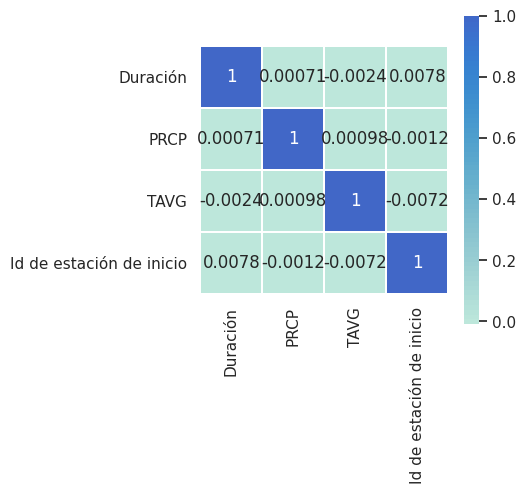

In [ ]:
f,axes = plt.subplots(1,1,figsize = (4,4))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)
plt.show()